# João Francisco Vieira Rodrigues Filho
#### joaofranciscovrfilho@gmail.com

# Importação de bibliotecas, base de dados e pré-processamento.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('churn_challenge_data.csv',delimiter=",")
df.head()

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,...,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,...,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,...,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,...,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,...,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0


## A quantidade máxima de amostras é 100.000.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       100000 non-null  int64  
 1   churn             100000 non-null  int64  
 2   HHstatin          62077 non-null   object 
 3   actvsubs          100000 non-null  int64  
 4   adjmou            100000 non-null  float64
 5   adjqty            100000 non-null  int64  
 6   adjrev            100000 non-null  float64
 7   adults            76981 non-null   float64
 8   area              99960 non-null   object 
 9   asl_flag          100000 non-null  object 
 10  attempt_Mean      100000 non-null  float64
 11  avg3mou           100000 non-null  int64  
 12  avg3qty           100000 non-null  int64  
 13  avg3rev           100000 non-null  int64  
 14  avg6mou           97161 non-null   float64
 15  avg6qty           97161 non-null   float64
 16  avg6rev           971

## ID do cliente é irrelevante. Assim como algumas outras colunas que, dado o contexto temporal do churn, também são irrelevantes. Podemos assim, remove-las.

In [4]:
try:
    df.drop('Customer_ID',axis=1 ,inplace=True) #ID do cliente é irrelevante
    # dado o contexto temporal do churn, entre 31 e 60 dias, é irrelevante
    df.drop('rev_Mean',axis=1 ,inplace=True) 
    df.drop('mou_Mean',axis=1 ,inplace=True) 
    df.drop('totmrc_Mean',axis=1 ,inplace=True) 
    df.drop('change_mou',axis=1 ,inplace=True) 
    df.drop('change_rev',axis=1 ,inplace=True) 
    df.drop('avgrev',axis=1 ,inplace=True) 
    df.drop('avgmou',axis=1 ,inplace=True)
    df.drop('avgqty',axis=1 ,inplace=True)
    df.drop('avg3mou',axis=1 ,inplace=True) 
    df.drop('avg3qty',axis=1 ,inplace=True) 
    df.drop('avg3rev',axis=1 ,inplace=True) 
    df.drop('avg6mou',axis=1 ,inplace=True) 
    df.drop('avg6qty',axis=1 ,inplace=True) 
    df.drop('avg6rev',axis=1 ,inplace=True)     
except:
    pass

## Tratando dados faltantes utilizando técnicas de preencher pela média, pela frequência ou em alguns casos, simplesmente excluindo casos que não farão tanta diferença, dado que são poucos casos...

In [5]:
#Preenche pela média
df['hnd_price'].fillna((df['hnd_price'].mean()), inplace=True)
df['income'].fillna((df['income'].mean()), inplace=True)
df['lor'].fillna((df['lor'].mean()), inplace=True)
df['numbcars'].fillna((int(df['numbcars'].mean())), inplace=True)
df['ovrmou_Mean'].fillna((df['ovrmou_Mean'].mean()), inplace=True)
df['ovrrev_Mean'].fillna((df['ovrrev_Mean'].mean()), inplace=True)
df['rv'].fillna((int(df['rv'].mean())), inplace=True)
df['vceovr_Mean'].fillna((df['vceovr_Mean'].mean()), inplace=True)
df['adults'].fillna((int(df['adults'].mean())), inplace=True)


#Preenche com o mais frequente
df['dwllsize'].fillna((df['dwllsize'].mode()[0]), inplace=True)
df['eqpdays'].fillna((df['eqpdays'].mode()[0]), inplace=True)
df['ethnic'].fillna((df['ethnic'].mode()[0]), inplace=True)
df['forgntvl'].fillna((df['forgntvl'].mode()[0]), inplace=True)
df['infobase'].fillna((df['infobase'].mode()[0]), inplace=True)
df['hnd_webcap'].fillna((df['hnd_webcap'].mode()[0]), inplace=True)
df['kid0_2'].fillna((df['kid0_2'].mode()[0]), inplace=True)
df['kid3_5'].fillna((df['kid3_5'].mode()[0]), inplace=True)
df['kid6_10'].fillna((df['kid6_10'].mode()[0]), inplace=True)
df['kid11_15'].fillna((df['kid11_15'].mode()[0]), inplace=True)
df['kid16_17'].fillna((df['kid16_17'].mode()[0]), inplace=True)
df['ownrent'].fillna((df['ownrent'].mode()[0]), inplace=True)
df['prizm_social_one'].fillna((df['prizm_social_one'].mode()[0]), inplace=True)
df['truck'].fillna((df['truck'].mode()[0]), inplace=True)
df['dwlltype'].fillna((df['dwlltype'].mode()[0]), inplace=True)
df['HHstatin'].fillna((df['HHstatin'].mode()[0]), inplace=True)

#Poucos casos
df = df[df['area'].notna()] 
df = df[df['creditcd'].notna()] 
df = df[df['da_Mean'].notna()] 
df = df[df['datovr_Mean'].notna()]
df = df[df['dualband'].notna()]
df = df[df['dualband'].notna()]
df = df[df['eqpdays'].notna()]
df = df[df['marital'].notna()]
df = df[df['models'].notna()]
df = df[df['phones'].notna()]
df = df[df['refurb_new'].notna()]

In [6]:
df.head()

,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,...,rv,threeway_Mean,totcalls,totmou,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,...,0.0,0.000000,1652,4228.00000,1504.62,0.0,0.0,6.333333,2,0.0
1,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,...,1.0,0.333333,14654,26400.00000,2851.68,1.0,0.0,61.333333,1,9.1
2,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,...,0.0,0.000000,7903,24385.05333,2155.91,0.0,0.0,2.666667,1,0.0
3,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,...,0.0,0.000000,1502,3065.00000,2000.90,0.0,0.0,0.000000,1,0.0
4,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,...,0.0,0.000000,4485,14028.00000,2181.12,0.0,0.0,77.000000,1,0.0


#### Resetando o index para não termos problema de desincronia...

In [7]:
df.reset_index(inplace=True)
try:
    df.drop('index',axis=1 ,inplace=True) #ID do cliente não é relevante
except:
    pass

In [8]:
df.head()

,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,...,rv,threeway_Mean,totcalls,totmou,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,...,0.0,0.000000,1652,4228.00000,1504.62,0.0,0.0,6.333333,2,0.0
1,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,...,1.0,0.333333,14654,26400.00000,2851.68,1.0,0.0,61.333333,1,9.1
2,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,...,0.0,0.000000,7903,24385.05333,2155.91,0.0,0.0,2.666667,1,0.0
3,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,...,0.0,0.000000,1502,3065.00000,2000.90,0.0,0.0,0.000000,1,0.0
4,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,...,0.0,0.000000,4485,14028.00000,2181.12,0.0,0.0,77.000000,1,0.0


## Agora podemos observar que não há mais dados faltantes. De 100.000 amostras, reduzimos para 97.879, o que corresponde a uma perda de somente 2,12%. Também reduzimos a dimensionalidade de 99 para 84 features.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97879 entries, 0 to 97878
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             97879 non-null  int64  
 1   HHstatin          97879 non-null  object 
 2   actvsubs          97879 non-null  int64  
 3   adjmou            97879 non-null  float64
 4   adjqty            97879 non-null  int64  
 5   adjrev            97879 non-null  float64
 6   adults            97879 non-null  float64
 7   area              97879 non-null  object 
 8   asl_flag          97879 non-null  object 
 9   attempt_Mean      97879 non-null  float64
 10  blck_dat_Mean     97879 non-null  float64
 11  blck_vce_Mean     97879 non-null  float64
 12  callfwdv_Mean     97879 non-null  float64
 13  callwait_Mean     97879 non-null  float64
 14  cc_mou_Mean       97879 non-null  float64
 15  ccrndmou_Mean     97879 non-null  float64
 16  comp_dat_Mean     97879 non-null  float6

## AutoML com Pycaret

In [10]:
from pycaret.classification import *

### Observações:

 Como podemos ver, há parâmetros que tem alta relação com o "churn", como por exemplo o campo "actvsubs", que diz respeito a quantidade de assinantes ativos em uma casa. Podemos perceber então que  quanto maior a quantidade de assinantes ativos, menor a chance do churn. Uma hipótese que podemos elaborar é que seria muito prejudicial para a família cancelar a assinatura do que se houvessem menos pessoas ativas ou até mesmo menos pessoas em geral na residência, não compensando o cliente realizar o churn.

 Outro parâmetro que possui grande relação com o churn é o  "adjmou", que diz respeito ao total de minutos que o cliente já usou. Podemos entender que quanto maior esse número, a mais tempo o cliente é assinante e está exposto a problemas técnicos por mais tempo, podendo gerar uma imagem negativa da empresa para o cliente e consequentemente, tendo maior probabilidade do cliente dar churn. Lembrando que tão importante quanto obter novos clientes, é mante-los.

 Assim como o parâmetro anterior, outro parâmetro que também tem alta relação com o churn dado o tempo de uso de um serviço é o parâmetro "adjqty", que desta vez diz respeito ao total de ligações que o cliente realizou. Quanto mais tempo utilizando o serviço, mais "oportunidades" o cliente tem de ter uma experiência ruim.

 Um parâmetro que evidencia bem a relação com o churn é o "attempt_Mean". Este diz respeito a quantidade de tentativas de chamadas realizadas pelos clientes. Um cliente que tenta e não consegue realizar as ligações é mais propenço a realizar o churn.

In [11]:
# Com a opção profile = True, podemos realizar observações pertinentes quanto aos dados antes da comparação de modelos numa visualização html (cuidado, exige muito de RAM).
classificador = setup (df, fold = 4, normalize= True, target='churn',
                       train_size=0.3, profile= False,session_id=42,silent=True) 

,Description,Value
0,session_id,42
1,Target,churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(97879, 84)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


## O perfil de cliente que possui maior probabilidade de evasão são aqueles que:
Possuem a quantidade de assinantes ativos próximos a quantidade de 1; 
Possuem muitos minutos de ligação; 
Possuem grande quantidade de tentativas de chamada;
Possuem grande quantidade de pagamento total;
Não ultrapassaram o limite de gasto da conta;
Possuem grande quantidade de chamadas em espera no suporte da empresa;
Possuem grande quantidade de minutos no suporte da empresa;
Não possuem cartão de crédito cadastrado para débito automático;
Já realizaram muitas ligações para o suporte da empresa;
Tiveram suas chamadas bloqueadas ou que a chamada caiu subitamente;
Tiveram seu pacote de dados bloqueados;




In [12]:
classificador

([],
 False,
 True,
 '9d42',
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x187a738da30>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x187a738de80>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x187a7378880>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x187a7378190>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x187a7378850>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x187a7397760>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x187a7397b50>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x187a7397d60>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x187b4e7d790>,
  'rf': <pycaret.containers.models.classification.RandomForestClassifierContaine

In [13]:
best = compare_models(fold = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6128,0.6590,0.6534,0.5999,0.6254,0.2263,0.2273,7.5725
lightgbm,Light Gradient Boosting Machine,0.6120,0.6573,0.6322,0.6029,0.6171,0.2242,0.2245,0.9950
ada,Ada Boost Classifier,0.6061,0.6474,0.6209,0.5982,0.6093,0.2124,0.2126,1.7050
rf,Random Forest Classifier,0.6010,0.6409,0.5831,0.5995,0.5912,0.2017,0.2018,2.7650
lr,Logistic Regression,0.5781,0.6114,0.5781,0.5730,0.5756,0.1563,0.1563,4.3525
ridge,Ridge Classifier,0.5776,0.0000,0.5778,0.5725,0.5751,0.1552,0.1552,0.1100
lda,Linear Discriminant Analysis,0.5773,0.6108,0.5779,0.5721,0.5750,0.1546,0.1547,0.8475
et,Extra Trees Classifier,0.5736,0.6067,0.5362,0.5740,0.5544,0.1465,0.1468,3.6375
svm,SVM - Linear Kernel,0.5506,0.0000,0.4169,0.5606,0.4621,0.0986,0.1036,0.5025
dt,Decision Tree Classifier,0.5436,0.5435,0.5378,0.5388,0.5383,0.0870,0.0870,0.5975


#### O modelo Gradient Boosting Classifier (gbc) demonstra ter o melhor desempenho em quase todas as métricas, apesar de ainda assim ter a 2° melhor precisão. Sendo assim, iremos utiliza-lo.

In [14]:
best_classificador = create_model(best,fold = 4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6129,0.6633,0.6423,0.6019,0.6215,0.2262,0.2267
1,0.6101,0.6571,0.6534,0.5968,0.6238,0.2209,0.2219
2,0.6146,0.6587,0.6710,0.5986,0.6327,0.2301,0.2318
3,0.6138,0.6570,0.6470,0.6021,0.6238,0.2280,0.2287
Mean,0.6128,0.6590,0.6534,0.5999,0.6254,0.2263,0.2273
SD,0.0017,0.0026,0.0109,0.0022,0.0043,0.0034,0.0036


### Podemos observar os resultados dos 4-fold cross validation. Mean é a média dos valores da função anterior, compare_models().

#### Realizando o ajuste dos parâmetros do modelo e focando na melhoria da acurácia.

In [15]:
tuned_class = tune_model(best_classificador,fold = 4, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6116,0.6595,0.6214,0.6046,0.6129,0.2234,0.2235
1,0.6189,0.6607,0.6407,0.6092,0.6245,0.2380,0.2383
2,0.6178,0.6635,0.6487,0.6063,0.6268,0.2360,0.2366
3,0.6121,0.6562,0.6222,0.6051,0.6135,0.2244,0.2245
Mean,0.6151,0.6600,0.6333,0.6063,0.6194,0.2305,0.2307
SD,0.0032,0.0026,0.0118,0.0018,0.0063,0.0066,0.0068


#### Visto que o método Bagging tem como foco melhorar a estabilidade e a acurácia, utilizaremos ele.

In [16]:
ensemble_class_bag = ensemble_model(tuned_class, method = 'Bagging',  fold = 4, n_estimators = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6137,0.6639,0.6264,0.6060,0.6160,0.2275,0.2277
1,0.6208,0.6649,0.6407,0.6114,0.6257,0.2418,0.2421
2,0.6206,0.6683,0.6459,0.6101,0.6275,0.2416,0.2420
3,0.6207,0.6614,0.6283,0.6141,0.6211,0.2415,0.2416
Mean,0.6189,0.6646,0.6353,0.6104,0.6226,0.2381,0.2383
SD,0.0030,0.0025,0.0082,0.0029,0.0045,0.0061,0.0062


## Gráficos

## AUC está acima de 0.5, assim, há uma boa chance do classificador ser capaz de distinguir os casos positivos dos casos negativos de forma correta

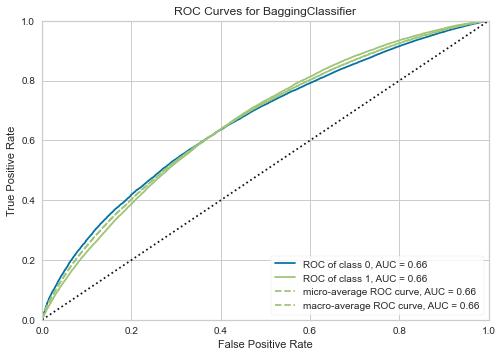

In [17]:
#AUC
plot_model(ensemble_class_bag,plot='auc')

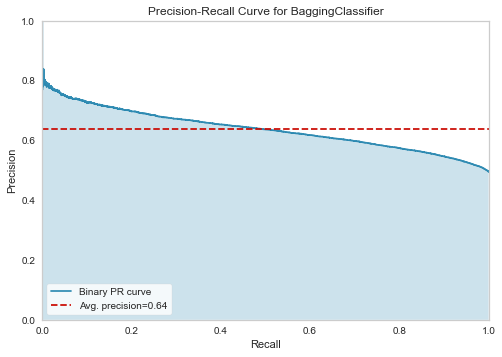

In [18]:
#Precision Recall Curve
plot_model(ensemble_class_bag,plot='pr')

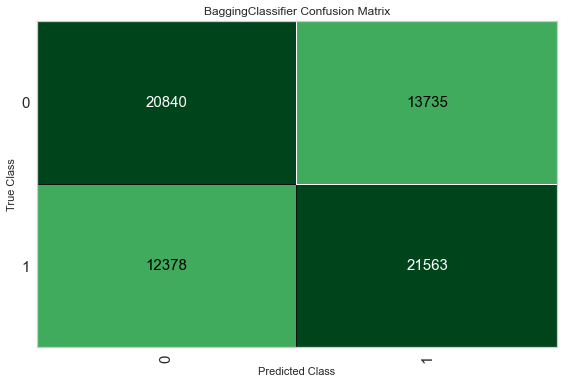

In [19]:
#Matriz de confusão
plot_model(ensemble_class_bag,plot='confusion_matrix')

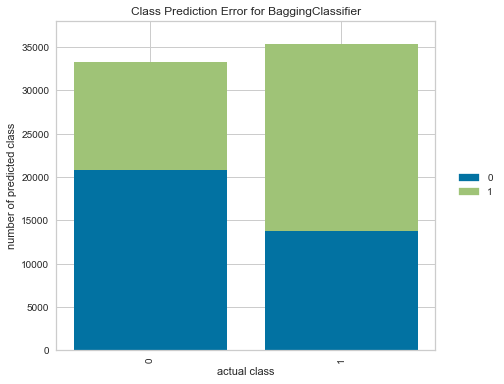

In [20]:
#Erro de previsão de classificação
plot_model(ensemble_class_bag,plot='error')

## Dado o prazo, uma abordagem interessante foi utilizar uma técnica de AutoML, a fim de decidir qual é o algoritimo mais promissor para um treinamento especializado; Não mais usando AutoML. Seria interessante prosseguir com um treinamento utilizando o Gradient Boosting Classifier ou Light Gradient Boosting Machine ou Ada Boost Classifier ou Random Forest Classifier, visto que foram os que obtiveram uma acurácia acima de 60%. 